## Getting Insight from Shipment Data

### Import the library and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = "datasample.csv"
data = pd.read_csv(file)

In [2]:
data.head()

,to_address,booking_date
0,JL. RAYA PASIR PUTIH NO. 6 RT 05/RW 03 (DEPAN ...,15-12-17
1,LEGENDA WISATA ZONA EINSTEIN BLOK R 12 NO 6 WA...,15-12-17
2,PERM CLUSTER TIDAR ASRI BLOK C7 NO 17 KEL RANG...,15-12-17
3,CIBUNTU SAYURAN RT 12/06 KEL WARUNG MUNCANG BA...,15-12-17
4,JL.CILENGKRANG 1 KOMP TIRTAWENING NO 10 UJUNG ...,15-12-17


### Pre-processing Data


Format kolom booking_date kebentuk Datetime format 

In [3]:
data['booking_date'] = pd.to_datetime(data['booking_date'], format = '%d-%m-%y')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999933 entries, 0 to 999932
Data columns (total 2 columns):
to_address      999933 non-null object
booking_date    999933 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 15.3+ MB


Pada analisis ini, saya hanya akan fokus pada beberapa kota besar di indonesia, yaitu:
1. Jadetabek (Jakarta, Depok, Tangerang, Bekasi)
2. Bandung
3. Medan
4. Makassar
5. Semarang
6. Palembang
7. Bandalampung
8. Batam
9. Padang
10. Ambon
11. Surabaya
12. Banjarmasin

Karena dari data-data alamat, banyak nama kota yang tidak kata-katanya tidak lengkap atau typo, saya akan mengelompokan kata-kata typo tersebut sesuai dengan nama kota yang benar

In [5]:
jadetabek = ['JAKARTA', 'DEPOK', 'TANGERANG', 'BEKASI', 'TANGERAN','DEPO', 'TANGERAN', 'BEKAS']
bandung = ['BANDU', 'BANDUN']
medan = ['MEDAN', 'MEDA']
makassar = ['MAKASSAR', 'MAKASSA', 'MAKASS']
semarang = ['SEMARANG', 'SEMARAN', 'SEMAR']
palembang = ['PALEMBANG','PALEMBAN','PALEMBA']
bandarlampung = ['BANDAR', 'BANDAR-LAMPUNG', 'BANDARLAMPUNG', 'LAMPUNG']
batam = ['BATAM','BATA']
padang = ['PADANG', 'PADAN']
ambon = ['AMBON','TERNATE','MALUKU','AMBO', 'MALUK']
surabaya = ['SURA','SURABAYA','SURABAY', 'SURABA', 'SURAB']
banjarmasin = ['BANJARMASIN', 'BANJARMASI','BANJARM', 'BANJARMA', 'BANJARMAS']

Ekstrak nama kota dari kolom 'to_address' ke kolom 'kota', dengan cara mengecek apakah address-address tersebut kalimatnya mengandung kota yang sudah didefiniskan diatas, jika ya, saya akan mengisi kolom 'kota' dengan nama kota tersebut sesuai.

In [6]:
for i in jadetabek:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'JADETABEK'
for i in bandung:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'BANDUNG'
for i in medan:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'MEDAN'
for i in makassar:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'MAKASSAR'
for i in semarang:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'SEMARANG'
for i in palembang:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'PALEMBANG'
for i in bandarlampung:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'BANDARLAMPUNG'
for i in batam:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'BATAM'
for i in padang:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'PADANG'
for i in ambon:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'AMBON'
for i in surabaya:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'SURABAYA'
for i in banjarmasin:
    data.loc[data[data['to_address'].str.contains(i)].index, 'kota'] = 'BANJARMASIN'


In [7]:
data['kota'].value_counts()

JADETABEK        155321
BANDUNG           68830
SURABAYA          61886
MEDAN             48773
SEMARANG          33109
BATAM             17147
BANDARLAMPUNG     15606
PALEMBANG         14483
PADANG            12772
MAKASSAR           9762
BANJARMASIN        9077
AMBON              5173
Name: kota, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999933 entries, 0 to 999932
Data columns (total 3 columns):
to_address      999933 non-null object
booking_date    999933 non-null datetime64[ns]
kota            451939 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 22.9+ MB


Karena kita fokus ke 11 kota tersebut, maka saya akan remove semua row dengan kota selain ke 11 kota tersebut

In [9]:
data.dropna(axis = 0, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451939 entries, 1 to 999930
Data columns (total 3 columns):
to_address      451939 non-null object
booking_date    451939 non-null datetime64[ns]
kota            451939 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 13.8+ MB


In [11]:
data.head(10)
data.to_excel("shipment.xlsx")

### Exploratory Data Analysis

Ploting total shipment tiap kota dalam 5 hari

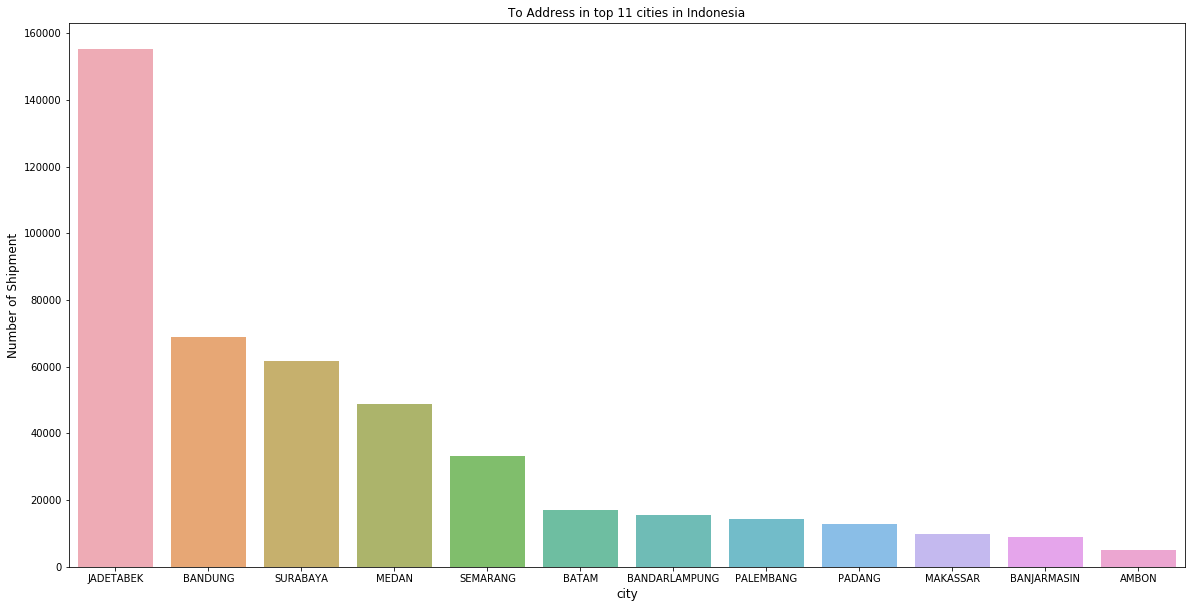

In [12]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
city_count  = data['kota'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('To Address in top 11 cities in Indonesia')
plt.ylabel('Number of Shipment', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

Dari hasil plottingan tersebut, terlihat bahwa dalam waktu 5 hari, kota-kota Jadetabek merpakan kota dengan jumlah shipment tertinggi, diikuti dengan Bandung dan Surabaya yang keduanya tidak berbeda jauh jumlah shipmentnya. Ambon merupakan kota dengan total shipment terendah dalam waktu 5 hari tersebut.

In [13]:
data.groupby(['booking_date', 'kota'])['to_address'].count()

booking_date  kota         
2017-12-11    AMBON             1912
              BANDARLAMPUNG     5039
              BANDUNG          22247
              BANJARMASIN       2960
              BATAM             6576
              JADETABEK        44794
              MAKASSAR          3364
              MEDAN            15209
              PADANG            4087
              PALEMBANG         4369
              SEMARANG         10980
              SURABAYA         24078
2017-12-12    AMBON             1885
              BANDARLAMPUNG     5996
              BANDUNG          25306
              BANJARMASIN       3654
              BATAM             6795
              JADETABEK        55635
              MAKASSAR          4259
              MEDAN            18253
              PADANG            4728
              PALEMBANG         5201
              SEMARANG         12736
              SURABAYA         24207
2017-12-13    AMBON             1171
              BANDARLAMPUNG     4291
          

Setelah mengamati keseluruhan data shipment, kemudian akan diamati data shipment per hari (dalam rentang 5 hari tersebut)

In [14]:
data_formatted =  data.groupby(['booking_date', 'kota'])['to_address'].count().unstack()
data_formatted.fillna(0, inplace=True)
data_formatted

kota,AMBON,BANDARLAMPUNG,BANDUNG,BANJARMASIN,BATAM,JADETABEK,MAKASSAR,MEDAN,PADANG,PALEMBANG,SEMARANG,SURABAYA
booking_date,,,,,,,,,,,,
2017-12-11,1912.0,5039.0,22247.0,2960.0,6576.0,44794.0,3364.0,15209.0,4087.0,4369.0,10980.0,24078.0
2017-12-12,1885.0,5996.0,25306.0,3654.0,6795.0,55635.0,4259.0,18253.0,4728.0,5201.0,12736.0,24207.0
2017-12-13,1171.0,4291.0,18678.0,2412.0,3573.0,43934.0,1982.0,13150.0,3625.0,4497.0,8341.0,12522.0
2017-12-14,203.0,276.0,2549.0,51.0,203.0,10838.0,157.0,2157.0,330.0,401.0,1023.0,1078.0
2017-12-15,2.0,4.0,50.0,0.0,0.0,120.0,0.0,4.0,2.0,15.0,29.0,1.0


Plotting data

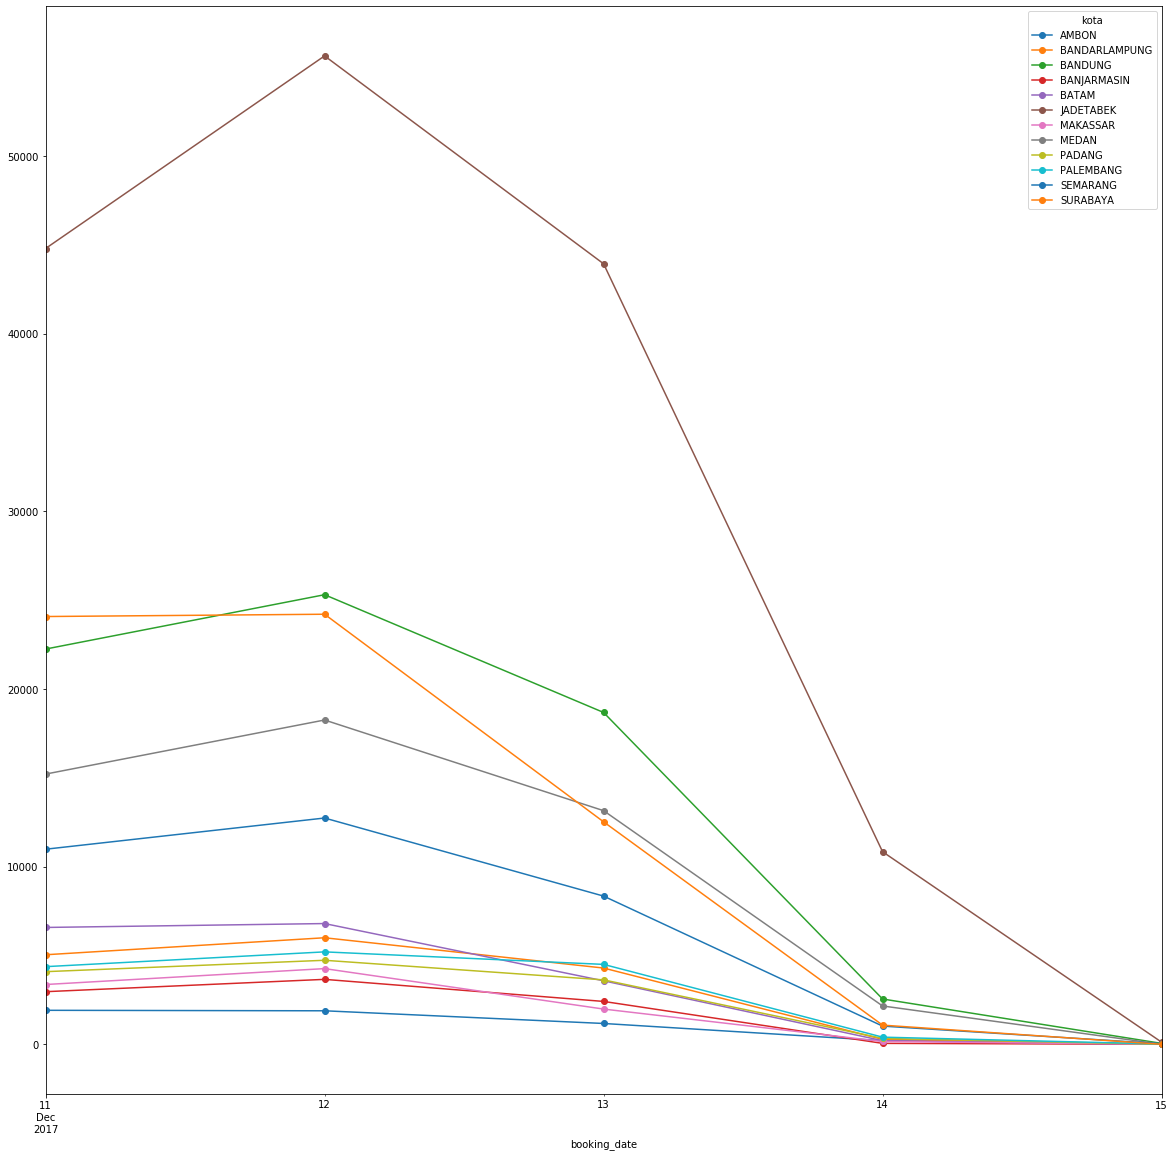

In [15]:
data_formatted.plot(figsize=(20, 20), marker = 'o')

### Forecasting

Apabila dilihat dari data dari hari kamis dan jumat, dari hari jumat ke kamis jumlah shipment sangat turun drastis secara keseluruhan begitu juga dari hari kamis ke jumat.

Sepertinya terdapat beberapa missing data untuk hari kamis dan hari jumat

Saya tidak akan forcast untuk hari selanjutnya, tetapi disini saya akan mencoba forecast total shipment tiap kota tersebut untuk hari kamis dan hari jumat, dikarenakan hari pada hari kamis dan jumat banyak missing data.

Model yang akan saya gunakan adalah Moving Average (MA)


In [17]:
moving_average = data_formatted.rolling(2).mean()

In [18]:
data_formatted.iloc[3:5, :] = moving_average.iloc[3:5, :]

In [19]:
data_formatted

kota,AMBON,BANDARLAMPUNG,BANDUNG,BANJARMASIN,BATAM,JADETABEK,MAKASSAR,MEDAN,PADANG,PALEMBANG,SEMARANG,SURABAYA
booking_date,,,,,,,,,,,,
2017-12-11,1912.0,5039.0,22247.0,2960.0,6576.0,44794.0,3364.0,15209.0,4087.0,4369.0,10980.0,24078.0
2017-12-12,1885.0,5996.0,25306.0,3654.0,6795.0,55635.0,4259.0,18253.0,4728.0,5201.0,12736.0,24207.0
2017-12-13,1171.0,4291.0,18678.0,2412.0,3573.0,43934.0,1982.0,13150.0,3625.0,4497.0,8341.0,12522.0
2017-12-14,687.0,2283.5,10613.5,1231.5,1888.0,27386.0,1069.5,7653.5,1977.5,2449.0,4682.0,6800.0
2017-12-15,102.5,140.0,1299.5,25.5,101.5,5479.0,78.5,1080.5,166.0,208.0,526.0,539.5


Plot the result

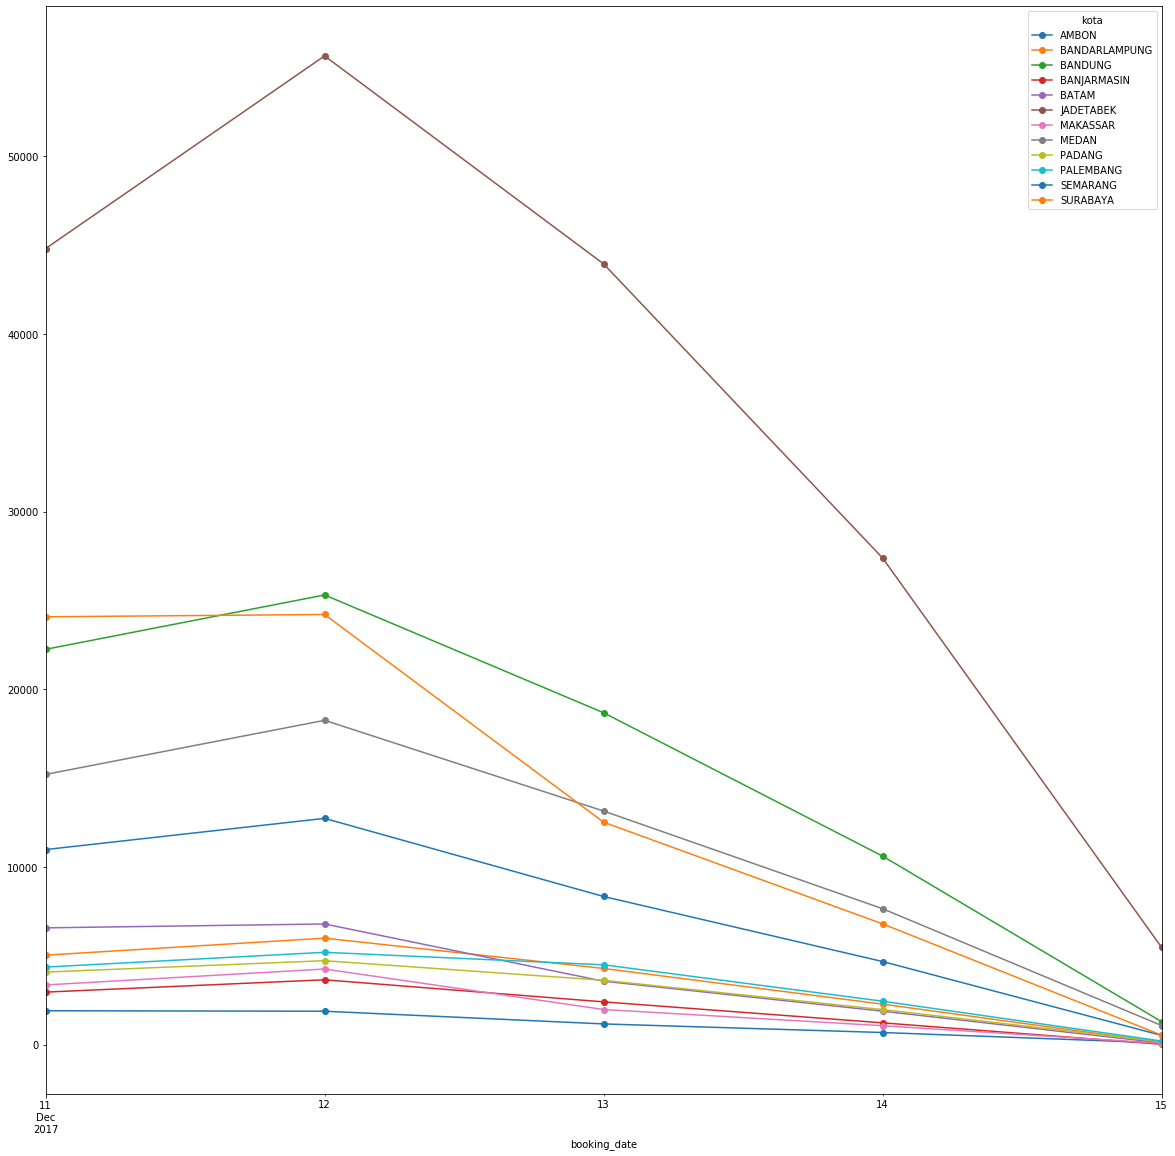

In [20]:
data_formatted.plot(figsize=(20, 20), marker = 'o')